In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn
matplotlib.style.use('ggplot')
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

### Load data and understand data types

In [2]:
data = pd.read_csv('D:/datasets/odi-batting.csv')
data.dtypes

Country       object
Player        object
Runs         float64
ScoreRate    float64
MatchDate     object
Weekday       object
Ground        object
Versus        object
URL           object
dtype: object

### Look at your data

In [3]:
data.head()

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,16-02-2010,Tue,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,01-09-2009,Tue,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,16-08-2010,Mon,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,10-07-2010,Sat,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,01-07-2010,Thu,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


### Summary Statistics
This is the first step in any machine learning excercise

In [4]:
data.describe(include='all')

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus,URL
count,55926,55926,55900.000000,55900.000000,55926,55926,55926,55926,55926
unique,22,1936,NaN,NaN,2757,7,178,25,3209
top,India,Sachin R Tendulkar,NaN,NaN,04-02-2007,Sun,Sharjah CA Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=1208
freq,6634,442,NaN,NaN,108,11427,3581,7216,22
mean,NaN,NaN,22.241413,65.314208,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,25.558363,44.213423,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Frequency Distribution of Dimensions
#### Count by Players

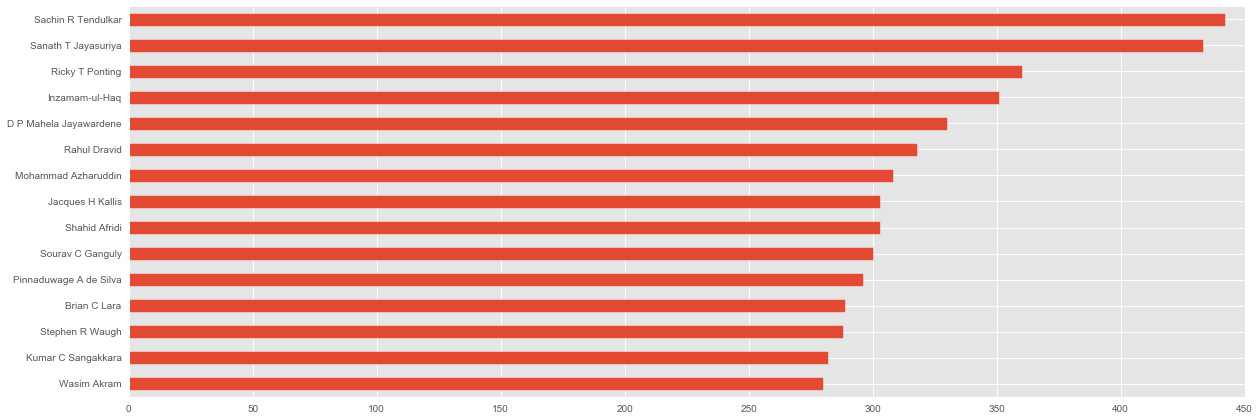

In [5]:
data.Player.value_counts().head(15)[::-1].plot.barh(figsize=(20,7))

#### Count by Country

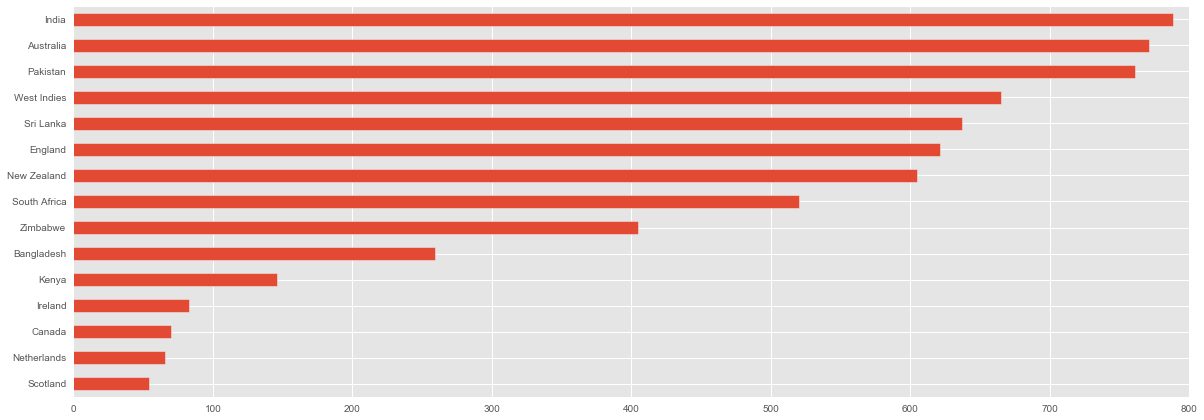

In [6]:
data[['Country', 'MatchDate']].drop_duplicates().Country.value_counts().head(15)[::-1].plot.barh(figsize=(20,7))

#### Count by Ground

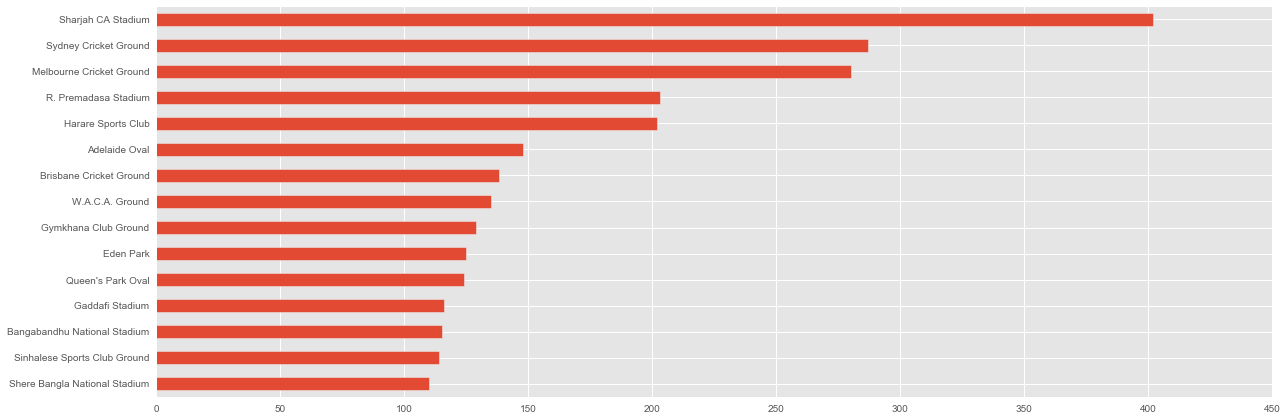

In [7]:
data[['Country', 'MatchDate', 'Ground']].drop_duplicates().Ground.value_counts().head(15)[::-1].plot.barh(figsize=(20,7))

#### Count by Versus

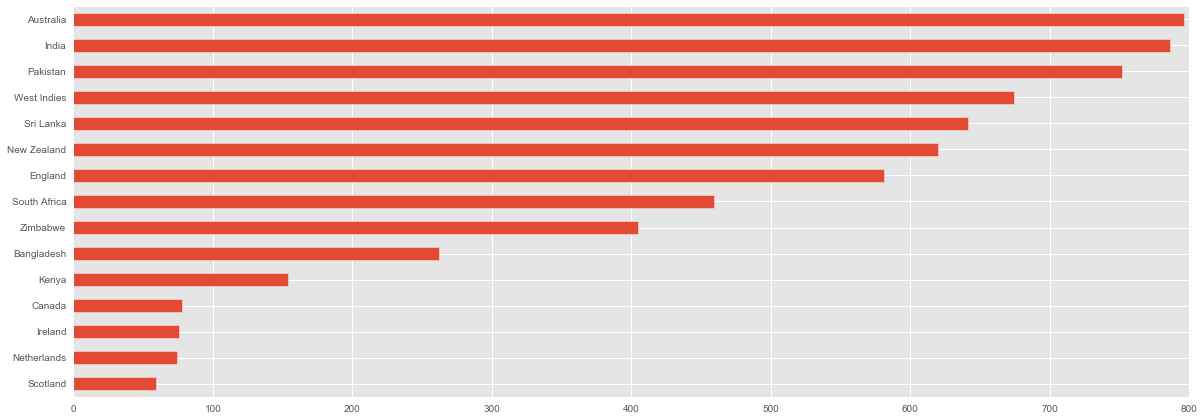

In [9]:
data[['Country', 'MatchDate', 'Versus']].drop_duplicates().Versus.value_counts().head(15)[::-1].plot.barh(figsize=(20,7))

### Frequency distribution of metrics

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD72CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF246A0>], dtype=object)

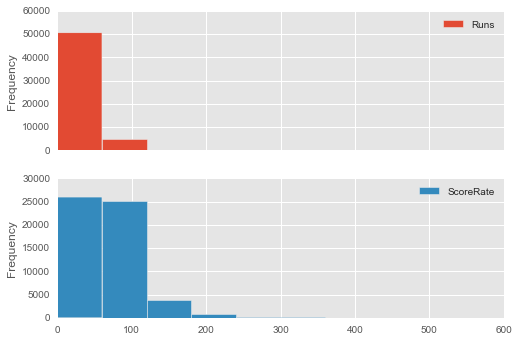

In [9]:
data[['Runs', 'ScoreRate']].plot.hist(subplots=True)

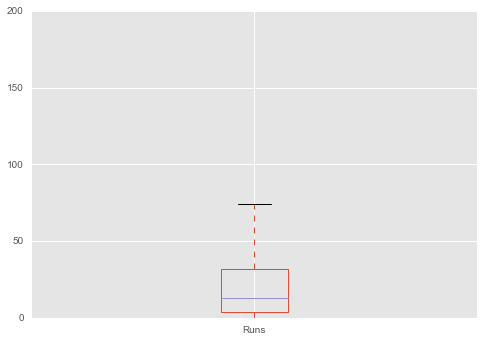

In [10]:
data['Runs'].plot.box()

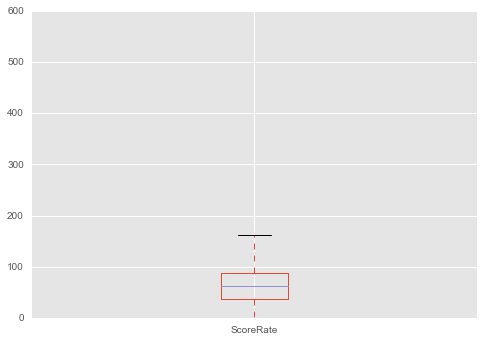

In [11]:
data['ScoreRate'].plot.box()

### Derive Metrics
#### Metrics from Dates Columns
* Day of the week
* Day of the month
* Day 0f the year
* Month of the year
* Week of the year
* Quarter of the year
* ....
### Metrics from Text Columns
* Number of characters
* Number of words
* Number of sentences
* Frequency of a particular word
* ....

### Dimensions & Metrics from Geography column
Assume you have a latitude & longitude of various locations
* City/District, State, Country, Contitent 
* Population count, No. of males, No. of females, Count of a particular religion (From census)
* Type of the location (Urban/Rural)
* Poverty of the location
* ....

In [10]:
data['MatchDate'] = pd.to_datetime(data['MatchDate'])
data['MatchDate'].head()

0   2010-02-16
1   2009-01-09
2   2010-08-16
3   2010-10-07
4   2010-01-07
Name: MatchDate, dtype: datetime64[ns]

In [11]:
data['DayofWeek'] = data.MatchDate.dt.strftime('%A')
data['Month'] = data.MatchDate.dt.strftime('%m')
data['Day'] = data.MatchDate.dt.day
data['Year'] = data.MatchDate.dt.year
dates_cols = ['DayofWeek', 'Month', 'Day', 'Year']
data[dates_cols].head()

,DayofWeek,Month,Day,Year
0,Tuesday,02,16,2010
1,Friday,01,9,2009
2,Monday,08,16,2010
3,Thursday,10,7,2010
4,Thursday,01,7,2010


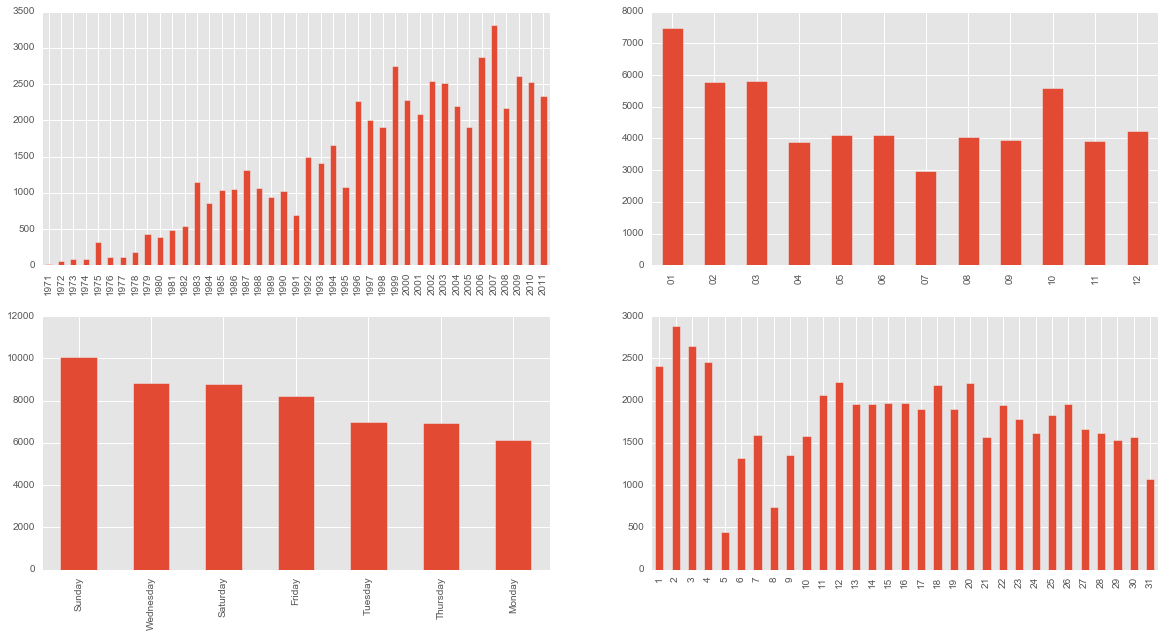

In [12]:
fig, axs = plt.subplots(2, 2)
data.Year.value_counts().sort_index().plot.bar(ax=axs[0,0], figsize=(20,10))
data.Month.value_counts().sort_index().plot.bar(ax=axs[0,1])
data.DayofWeek.value_counts().plot.bar(ax=axs[1,0])
data.Day.value_counts().sort_index().plot.bar(ax=axs[1,1])

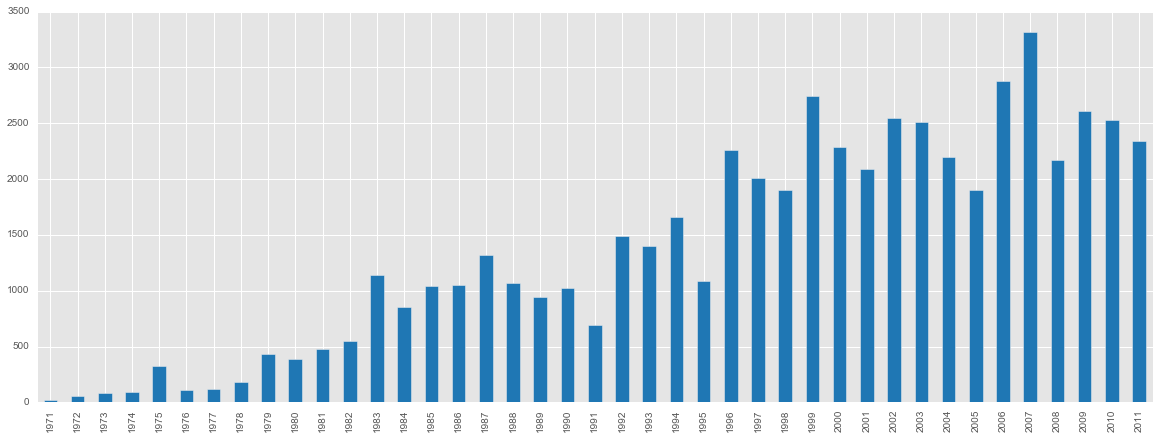

In [13]:
plot_data = data['Year'].value_counts().sort_index()
my_colors = np.array(['#1F77B4'] * len(plot_data))
plot_data.plot(kind='bar', figsize=(20, 7), color=my_colors)

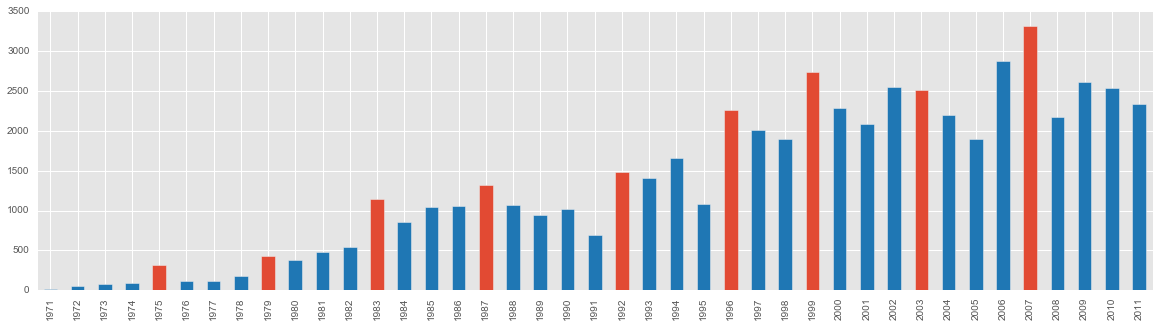

In [14]:
plot_data = data['Year'].value_counts().sort_index()
my_colors = np.array(['#1F77B4'] * len(plot_data))
my_colors[[4, 8, 12, 16, 21, 25, 28, 32, 36]] = '#E24A33'
plot_data.plot(kind='bar', figsize=(20, 5), color=my_colors)

#### Metrics from Text

In [15]:
data['names_words'] = data['Player'].str.split(' ').apply(lambda v: len(v))
data['names_first_char'] = data['Player'].str[0]
data['names_last_char'] = data['Player'].str[-1]
data['names_chars'] = data['Player'].str.len() 
data[['names_words', 'names_first_char', 'names_chars', 'names_last_char']].head()

,names_words,names_first_char,names_chars,names_last_char
0,2,M,16,d
1,2,M,16,d
2,2,M,16,d
3,2,M,16,d
4,2,M,16,d


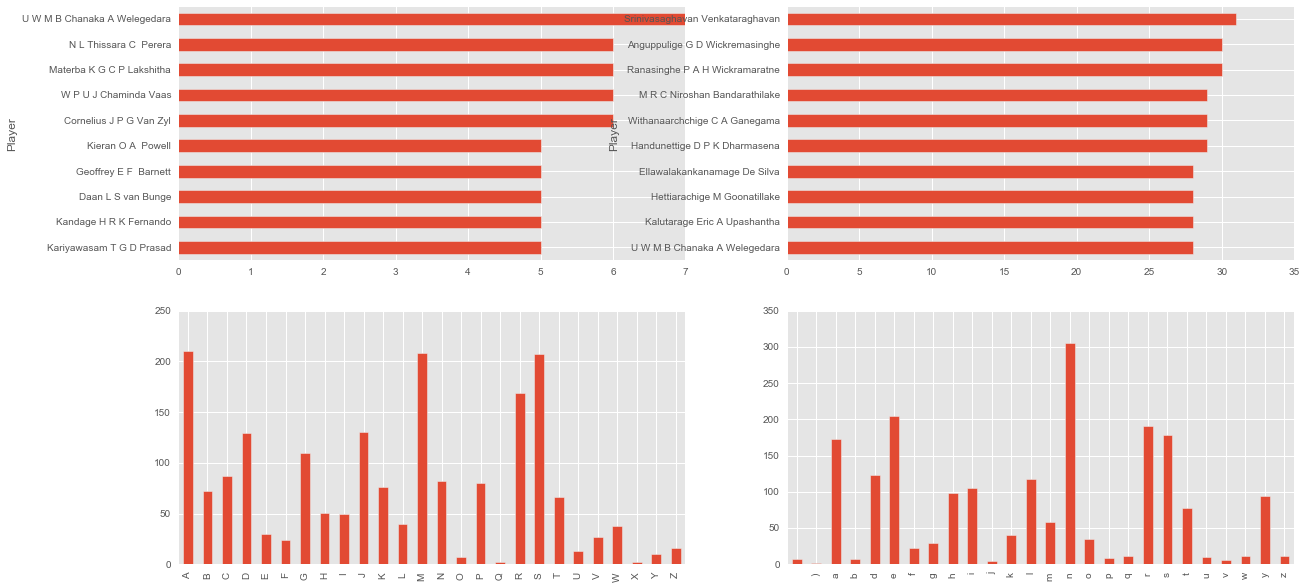

In [16]:
fig, axs = plt.subplots(2, 2)
data.groupby('Player')['names_words'].first().sort_values(ascending=False).head(10)[::-1].plot.barh(ax=axs[0,0], figsize=(20,10))
data.groupby('Player')['names_chars'].first().sort_values(ascending=False).head(10)[::-1].plot.barh(ax=axs[0,1])
first_char = data.groupby(['Player', 'names_first_char'])['Country'].first().reset_index()['names_first_char'].value_counts().head(26)
first_char.sort_index().plot.bar(ax=axs[1,0])
last_char = data.groupby(['Player', 'names_last_char'])['Country'].first().reset_index()['names_last_char'].value_counts().head(26)
last_char.sort_index().plot.bar(ax=axs[1,1])

### Bi-variate Analysis

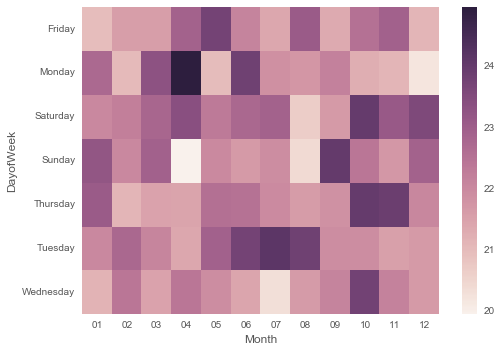

In [17]:
crosstab = pd.crosstab(index=data['DayofWeek'], columns=data['Month'], values=data['Runs'], aggfunc='mean')
seaborn.heatmap(crosstab)

In [1]:
crosstab = pd.crosstab(index=data['Country'], columns=data['Versus'], values=data['Runs'], aggfunc='mean')
seaborn.heatmap(crosstab)
seaborn.palplot(sns.color_palette("PuBu", 10))

NameError: name 'pd' is not defined

### Statistical Validation

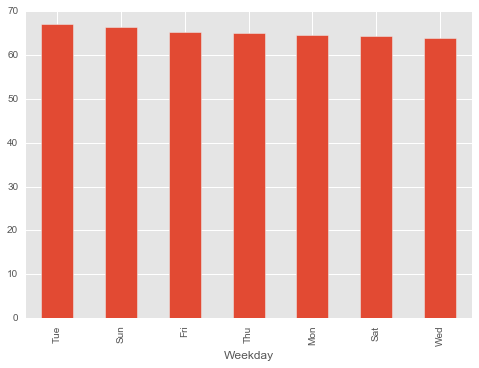

In [19]:
weekly = data.groupby(['Weekday'])['ScoreRate'].mean().sort_values(ascending=False)
weekly.plot.bar()

#### Hypothesis test

In [20]:
samples_hi_mean = data[data['Weekday'] == 'Tue']['ScoreRate'].dropna()
samples_lo_mean = data[data['Weekday'] == 'Wed']['ScoreRate'].dropna()

t, p = ttest_ind(samples_hi_mean.values, samples_lo_mean.values)
print t, p
if p > 0.01:
    print 'Means are not independent'
else:
    print 'Mean are independent'

4.33454783623 1.46959502667e-05
Mean are independent


### Machine learning
#### K-Means Clustering

In [21]:
data._get_numeric_data().head()

,Runs,ScoreRate,Day,Year,names_words,names_chars
0,118.0,97.52,16,2010,2,16
1,110.0,99.09,9,2009,2,16
2,100.0,138.88,16,2010,2,16
3,82.0,75.92,7,2010,2,16
4,57.0,100.00,7,2010,2,16


In [28]:
kmeans = KMeans(n_clusters=10)
players = data[['Player', 'ScoreRate', 'Runs', 'names_words', 'names_chars']].groupby('Player').mean()
fit = kmeans.fit(players)
players['cluster'] = fit.labels_
players = players.reset_index()

In [29]:
players.head()

,Player,ScoreRate,Runs,names_words,names_chars,cluster
0,Aamer Hanif,70.295000,22.250000,2,11,1
1,Aamer Malik,50.136957,24.173913,2,11,8
2,Aamir Nazir,85.416667,4.333333,2,11,2
3,Aamir Sohail,57.796710,30.838710,2,12,8
4,Aaqib Javed,64.442549,5.235294,2,11,6


In [30]:
players.cluster.value_counts()

6    338
0    297
8    277
1    276
5    246
2    216
3    137
9    124
4     24
7      1
Name: cluster, dtype: int64

In [31]:
players[players['cluster'] == 0]['Player'].unique()

array(['Aashish R Kapoor', 'Aasif Y Karim', 'Abdur Rehman',
       'Abhijit V Kale', 'Aijaz Ali', 'Ajith P Weerakkody',
       'Al Sahariar Rokon', 'Alam Talukdar', 'Alan C I Lock',
       'Alan G Hurst', 'Alan P Igglesden', 'Alester Maregwede',
       'Alfred S Luseno', 'Ali Asad', 'Andrew D Poynter',
       'Andrew J Pycroft', 'Anthony McGrath', 'Anthony O Suji',
       'Antony R M Opatha', 'Arachchige W R Madurasinghe', 'Arshad Ali',
       'Arshad Laeeq', 'Arthur D J Pitcher', 'Ashraf Ali', 'Asif Masood',
       'Ata-Ur-Rehman', 'Athanasios J Traicos', 'Austin Codrington',
       'Azeem Hafeez', 'Balfour P Patterson', 'Balwinder S Sandhu',
       'Benjamin A Stokes', 'Benjamin W Hilfenhaus', 'Bernard D Julien',
       'Bharat Reddy', 'Bhupinder Singh', 'Bishen S Bedi', 'Brett Geeves',
       'Bruce A Reid', 'Bruce N French', 'Bruce Yardley',
       'Bryan G Murgatroyd', 'Calum S Macleod', 'Charles A Reid',
       'Christopher E W Silverwood', 'Christopher T Tremlett',
       'Clift

In [26]:
data['Player'].nunique()

1936